In [ ]:
!pip install -U scikit-fuzzy




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz

 x= np.arrange(11)
  mfx= fuzz.trimf(x;[0,5,10])
                


IndentationError: ignored

In [ ]:
import numpy as np
import skfuzzy as fuzz

x= np.arange(11)
mfx= fuzz.trimf(x,[0,5,10])

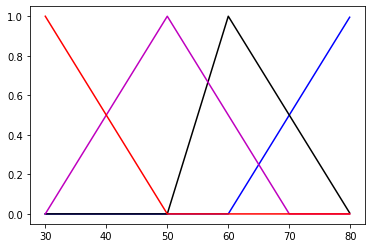

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
slow=fuzz.trimf(x,[30,30,50])
medium=fuzz.trimf(x,[30,50,70])
medium_fast=fuzz.trimf(x,[50,60,80])
full_speed=fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
# điểm đầu 30 đạt đỉnh 50 két thúc 70





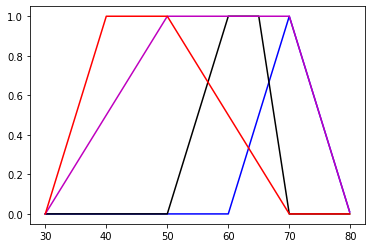

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
slow=fuzz.trapmf(x,[30,40,50,70])
medium=fuzz.trapmf(x,[30,50,70,80])
medium_fast=fuzz.trapmf(x,[50,60,65,70])
full_speed=fuzz.trapmf(x,[60,70,70,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')


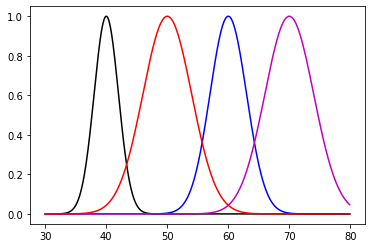

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
slow=fuzz.gaussmf(x,50,4)
medium=fuzz.gaussmf(x,70,4)
medium_fast=fuzz.gaussmf(x,40,2)
full_speed=fuzz.gaussmf(x,60,3)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

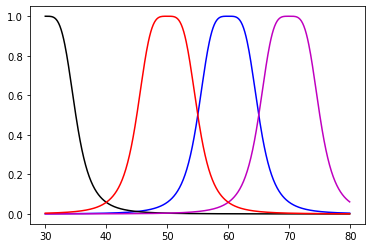

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
slow=fuzz.gbellmf(x,5,2,50)
medium=fuzz.gbellmf(x,5,2,70)
medium_fast=fuzz.gbellmf(x,5,2,30)
full_speed=fuzz.gbellmf(x,5,2,60)
#b>c:  gbell(x,b,c,a)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food =ctrl.Antecedent(np.arange(0,11,0.1),'Food')
#antecendent là input
service =ctrl.Antecedent(np.arange(0,11,0.1),'Service')
tip= ctrl.Antecedent(np.arange(10,31,0.1),'Tip')


food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,5,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,5,10])
tip['less']= fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,20,30])

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3=ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule4=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6=ctrl.Rule(food['good']&service['good'],tip['much'])
rule7=ctrl.Rule(food['poor']&service['poor'],tip['normal'])
rule8=ctrl.Rule(food['average']&service['average'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food']=6.5
tipping.input['Service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

#food.view()
#service.view()
#tip.view()

KeyError: ignored

26.6500000000002


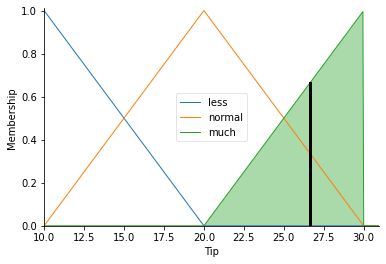

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1), 'Food')
service = ctrl.Antecedent(np.arange(0,11,1), 'Service')
tip = ctrl.Consequent(np.arange(10,31,0.05), 'Tip')
#------------------#
food['poor'] = fuzz.trimf(food.universe,[0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])
#------------------#
service['poor'] = fuzz.trimf(service.universe,[0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])
#------------------#
tip['less'] = fuzz.trimf(tip.universe,[10, 10, 20])
tip['normal'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe, [20, 30, 30])

rule_1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule_2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule_3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule_4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule_5 = ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule_6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule_7 = ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule_8 = ctrl.Rule(food['good'] & service['average'],tip['normal'])
rule_9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

rule = [rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9]
tipping_ctrl = ctrl.ControlSystem(rule)
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 10
tipping.input['Service'] = 10
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)
#food.view()
#service.view()
#tip.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

rice = ctrl.Antecedent(np.arange(0,1000,1), 'Rice')
time = ctrl.Antecedent(np.arange(0,25,1), 'Time')
power = ctrl.Consequent(np.arange(400,25000,10), 'Power')
#------------------#
rice['too-less'] = fuzz.trimf(rice.universe,[0, 0, 200])
rice['less'] = fuzz.trimf(rice.universe, [0, 200, 400])
rice['average'] = fuzz.trimf(rice.universe, [200, 400, 600])
rice['much'] = fuzz.trimf(rice.universe, [400, 600, 800])
rice['too-much'] = fuzz.trimf(rice.universe, [600, 800, 1000])
#------------------#
time['too-fast'] = fuzz.trimf(time.universe,[0, 0, 5])
time['fast'] = fuzz.trimf(time.universe, [0, 5, 10])
time['average'] = fuzz.trimf(time.universe, [5, 10, 15])
time['slow'] = fuzz.trimf(time.universe, [10, 15, 20])
time['too-slow'] = fuzz.trimf(time.universe, [15, 20, 25])
#------------------#
power['verylow'] = fuzz.trimf(tip.universe,[10, 10, 20])
tip['low'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['middle'] = fuzz.trimf(tip.universe, [20, 30, 30])
tip['high'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['veryhigh'] = fuzz.trimf(tip.universe, [20, 30, 30])

rule_1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule_2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule_3 = ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule_4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule_5 = ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule_6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule_7 = ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule_8 = ctrl.Rule(food['good'] & service['average'],tip['normal'])
rule_9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

rule = [rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9]
tipping_ctrl = ctrl.ControlSystem(rule)
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 10
tipping.input['Service'] = 10
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x=np.arange(-100,100,1)

anpha=ctrl.Antecedent(x,'anpha')
trend=ctrl.Antecedent(x,'trend')
force=ctrl.Antecedent(x,'force')

anpha['LN']=fuzz.trimf(x,[-90,-90,0])
anpha['N']=fuzz.trimf(x,[-90,0,90])
anpha['ze']=fuzz.trimf(x,[0,0,90])


trend['-2']=fuzz.trimf(x,[-45,-45,0])
trend['0']=fuzz.trimf(x,[-45,0,45])
trend['-2']=fuzz.trimf(x,[0,45,45])


force['S']=fuzz.trimf(x,[-100,-100,0])
force['N']=fuzz.trimf(x,[-100,0,100])
force['W']=fuzz.trimf(x,[0,100,100])


rule_1=ctrl.

plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')